# **Task 3 : Exploring Unsupervised Machine Learning**

Unsupervised learning helps us to train unlabeled data

### **Clustering**

In this clustering task we will classify 3 differernt types of **Iris flowers**, which are:
- Iris-Setosa
- Iris-Versicolor
- Iris-Virginica

I used the following algorithms
- K-Means Clustering
- Hierarchial Clustering

At the end of the file you'll get the best model out of the above mentioned algorithms

### **Importing the libraries**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Importing the dataset**

Importing the dataset from `datasets` in `sklearn`

In [2]:
iris = datasets.load_iris()
iris_dataframe = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Using seaborn plot-pairplot, which shows the bivariate relation between each pair of features. From the pairplot, we'll see that the **Iris-setosa** species is separataed from the other two across all feature combinations.

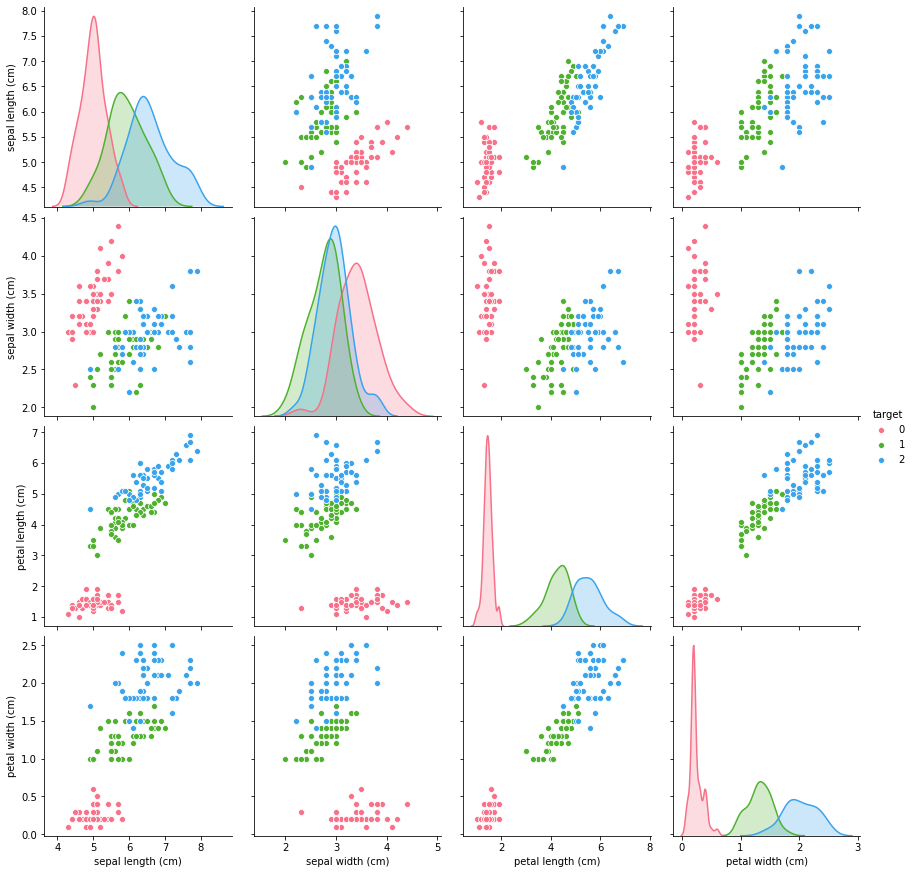

In [13]:
# Adding the target column to the dataframe.
iris_dataframe['target'] = iris.target

sns.pairplot(iris_dataframe, hue='target',palette='husl', height=3)
plt.show()

### **Getting the data**

In [14]:
X = iris.data

## **K-means Clustering**

**Algorithm**
- Choose the number of k clusters.
- Select at random k points, the centroids
- Assign each datapoint to the closest centroid - that forms k clusters
- Compute and place the new centroid of each cluster.
- Reassign each datapoint to the new closest centroid. If any reassignment took place, go to above step, else end.

But sklearn does all the above steps for us. We just have to find how many clusters we need. We can do that using elbow method.

### **Using Elbow method to find optimal number of clusters**



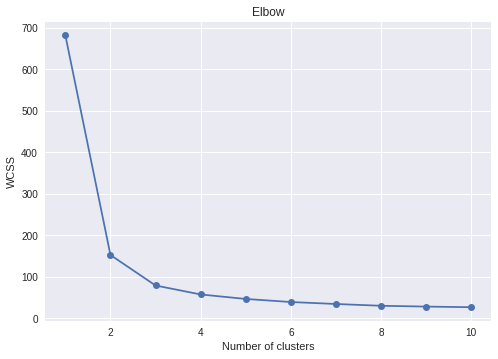

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.style.use('seaborn')
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow')
plt.show()

From above graph it is clear that optimal value for k is **3**

### **Training the K-Means model**

In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
# Prining the predicted values of clusters
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### **Visualising the clusters**

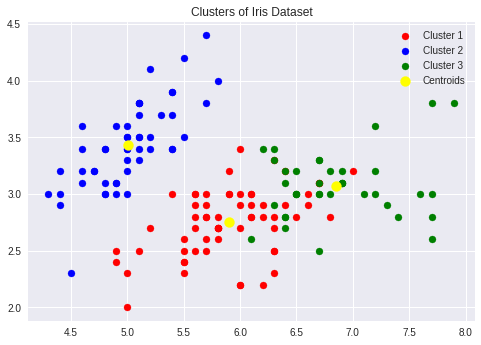

In [21]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters of Iris Dataset')
plt.legend()
plt.show()

Visualising using the data which we know

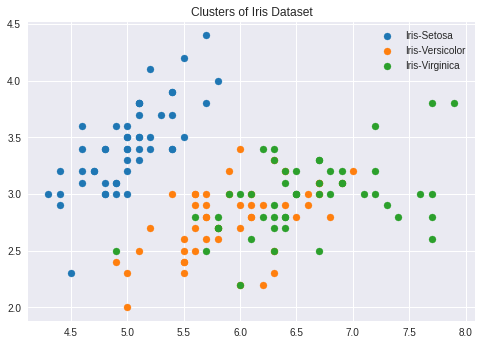

In [23]:
plt.scatter(X[iris.target==0,0], X[iris.target==0,1], c='#1f77b4', label='Iris-Setosa')
plt.scatter(X[iris.target==1,0], X[iris.target==1,1], c='#ff7f0e', label='Iris-Versicolor')
plt.scatter(X[iris.target==2,0], X[iris.target==2,1], c='#2ca02c', label='Iris-Virginica')
plt.title('Clusters of Iris Dataset')
plt.legend()
plt.show()

By comparing both plots it is clear that:
- Cluster 1 = Iris-Versicolor
- Cluster 2 = Iris-Setosa
- Cluster 3 = Iris-Virginica

Since we know the output we are able to classify, but in real life we can't compare because there will be no labels.

## **Hierarchial Clustering**

**Algorithm**
- Make each data poin a single-point cluster, which forms N cluters.
- Take two closest datapoints and make them one cluster, which forms N-1 clusters.
- Take two closest datapoints and make them one cluster, which forms N-2 clusters.
- Repeat above step until only one cluster.


To find the optimal number of clusters we use **Dendrograms**

### **Using the Dendrogram for finding optimal number of clusters**

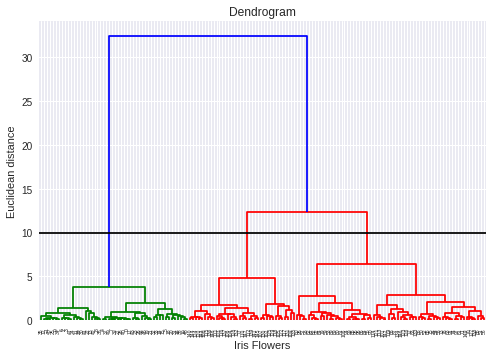

In [31]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Iris Flowers')
plt.ylabel('Euclidean distance')
plt.axhline(y=10, c='black')
plt.show()

For this we have put a threshold of dissimilarity and make a decision based on that. Hypothetically we choose longest vertical line where no horizontal extensions cut it. Here it is the red 2nd red line that black line cuts. Therefore, number of clusters are **3**.

### **Training the Hierarchial clustering model**

In [32]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
# Prining the predicted values of clusters
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### **Visualising the clusters**

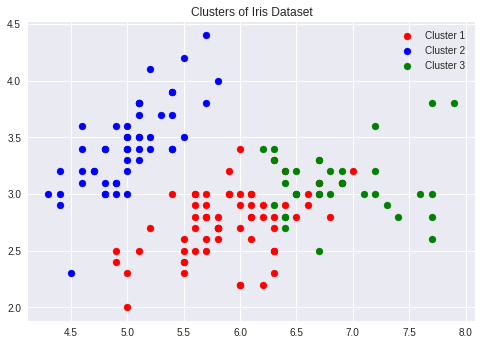

In [33]:
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], c='red', label='Cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], c='blue', label='Cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], c='green', label='Cluster 3')
plt.title('Clusters of Iris Dataset')
plt.legend()
plt.show()

Comparing with original values.

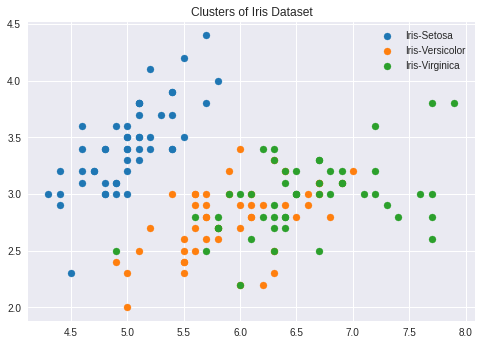

In [34]:
plt.scatter(X[iris.target==0,0], X[iris.target==0,1], c='#1f77b4', label='Iris-Setosa')
plt.scatter(X[iris.target==1,0], X[iris.target==1,1], c='#ff7f0e', label='Iris-Versicolor')
plt.scatter(X[iris.target==2,0], X[iris.target==2,1], c='#2ca02c', label='Iris-Virginica')
plt.title('Clusters of Iris Dataset')
plt.legend()
plt.show()